</p><h1 align="center">Housing price prediction</h1>. <br>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.<br>

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not<br>

The company wants to know:<br>

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.<br>

 

Also, determine the optimal value of lambda for ridge and lasso regression.



In [104]:
# import the libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [106]:
# Read the data

In [107]:
House_df = pd.read_csv('train.csv')

#### Check header and footer to remove them

In [108]:
House_df.head(1)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  

[1 rows x 81 columns]

In [109]:
House_df.tail(1)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1459         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1459      6   2008        WD         Normal     147500  

[1 rows x 81 columns]

#### Check the duplicates to remove them

In [110]:
House_df.duplicated().sum()

0

In [111]:
House_df.shape

(1460, 81)

In [112]:
House_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [113]:
House_df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

### Handling of Missing  values 

In [114]:
# create Na_df to handle the Null values

In [115]:
Na_df=House_df[House_df.columns[House_df.isna().any()]]

In [116]:
Na_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [117]:
Null_counts = round((Na_df.isna().sum()/Na_df.shape[0])*100,2).sort_values()
Null_counts

Electrical       0.07
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtExposure     2.60
BsmtFinType2     2.60
GarageCond       5.55
GarageQual       5.55
GarageFinish     5.55
GarageYrBlt      5.55
GarageType       5.55
LotFrontage     17.74
FireplaceQu     47.26
MasVnrType      59.73
Fence           80.75
Alley           93.77
MiscFeature     96.30
PoolQC          99.52
dtype: float64

- Prediction variables having more than 40% null values doesnot contribute much to model hence drop them.

In [118]:
# select the columns having null values more than 40 %

In [119]:
col = Null_counts[Null_counts>40].index
col

Index(['FireplaceQu', 'MasVnrType', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'], dtype='object')

In [120]:
# removing the null value columns

In [121]:
House_df = House_df.drop(House_df[col], axis=1)
Na_df = Na_df.drop(Na_df[col], axis=1)

- Id column doesnot contribute for model hence remove the column

In [122]:
House_df = House_df.drop('Id', axis=1)

In [123]:
House_df.shape

(1460, 74)

In [124]:
Na_df.columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [125]:
# create Numeric columns data frame and anlyse the missing values

In [126]:
Numeric = Na_df.select_dtypes(['float64','int64'])
Numeric.isna().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

- Impute numerical   variables   'LotFrontage'  ,  'MasVnrArea'   with   median   and   categorical   variable'GarageYrBlt' with 0

In [127]:
# imputing the numeric variables with median

In [128]:
House_df[['LotFrontage','MasVnrArea']] = House_df[['LotFrontage','MasVnrArea']].fillna(House_df[['LotFrontage','MasVnrArea']].median())
House_df['GarageYrBlt']= House_df['GarageYrBlt'].fillna(0)

In [129]:
# Inspect the null values post imputation

In [130]:
House_df[['LotFrontage','MasVnrArea','GarageYrBlt']].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [131]:
# create Object columns data frame and anlyse the missing values

In [132]:
Object = Na_df.select_dtypes(['O'])
Object.isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

- Since available data for anlysing is limited and to retain data frame properties,Impute the Null values in Object  variables  with  'None' 

In [133]:
House_df[Object.columns]= House_df[Object.columns].fillna('None')

In [134]:
# Inspect the null values post imputation

In [135]:
House_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [136]:
# verify the data frame for unique value variables having morethan 90% to remove them

In [137]:
Unique_val= round(House_df.nunique()/len(House_df),2)*100
Unique_val90 = Unique_val[Unique_val>90]
Unique_val90

Series([], dtype: float64)

In [138]:
# House_df.nunique()[House_df.nunique()==1].index


-  Unique values more than 90% columns are not present in data frame.

In [139]:
# verify dataframe the numerical variables data 

In [140]:
Numeric_df=House_df.select_dtypes(['int64','float64'])
Numeric_df.head()


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [141]:
Numeric_df.describe([0.25,0.5,0.75,0.80,0.90,0.95]).T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      69.863699     22.027677     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.117123    180.731373      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1868.739726    453.697295      0.0    1958.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       80%       90%        95%       max  
MSSubClass         50.0      70.00      80.0     120.0     160.00     190.0  
LotFrontage        69.0      79.00      80.0      92.0     104.00     313.0  
LotArea          9478.5   11601.50   12205.8   14381.7   17401.15  215245.0  
OverallQual         6.0       7.00       7.0       8.0       8.00      10.0  
OverallCond         5.0       6.00       7.0       7.0       8.00       9.0  
YearBuilt        1973.0    2000.00    2003.0    2006.0    2007.00    2010.0  
YearRemodAdd     1994.0    2004.00    2005.0    2006.0    2007.00    2010.0  
MasVnrArea          0.0     164.25     205.2     335.0     456.00    1600.0  
BsmtFinSF1        383.5     712.25     806.4    1065.5    1274.00    5644.0  
BsmtFinSF2          0.0       0.00       0.0     117.2     396.20    1474.0  
BsmtUnfSF         477.5     808.00     896.0    1232.0    1468.00    2336.0  
TotalBsmtSF       991.5    1298.25    1391.2    1602.2    1753.00    6110.0  
1stFlrSF         1087.0    1391.25    1482.4    1680.0    1831.25    4692.0  
2ndFlrSF            0.0     728.00     796.2     954.2    1141.05    2065.0  
LowQualFinSF        0.0       0.0

- After analysing the quantile data learnt that Outliers are significant above 95% data this will be handeled by scaling the data.

In [142]:
# verify dataframe the object variables data 

In [143]:
Object_df = House_df.select_dtypes(['O'])
Object_df.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 37 columns]

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [144]:
#sub set the continuous variables and plot scatter plot and Heat map.

In [145]:
Numeric_vars = Numeric_df.columns.to_list()

In [146]:
#Visualising numerical predictor variables with Target Variables

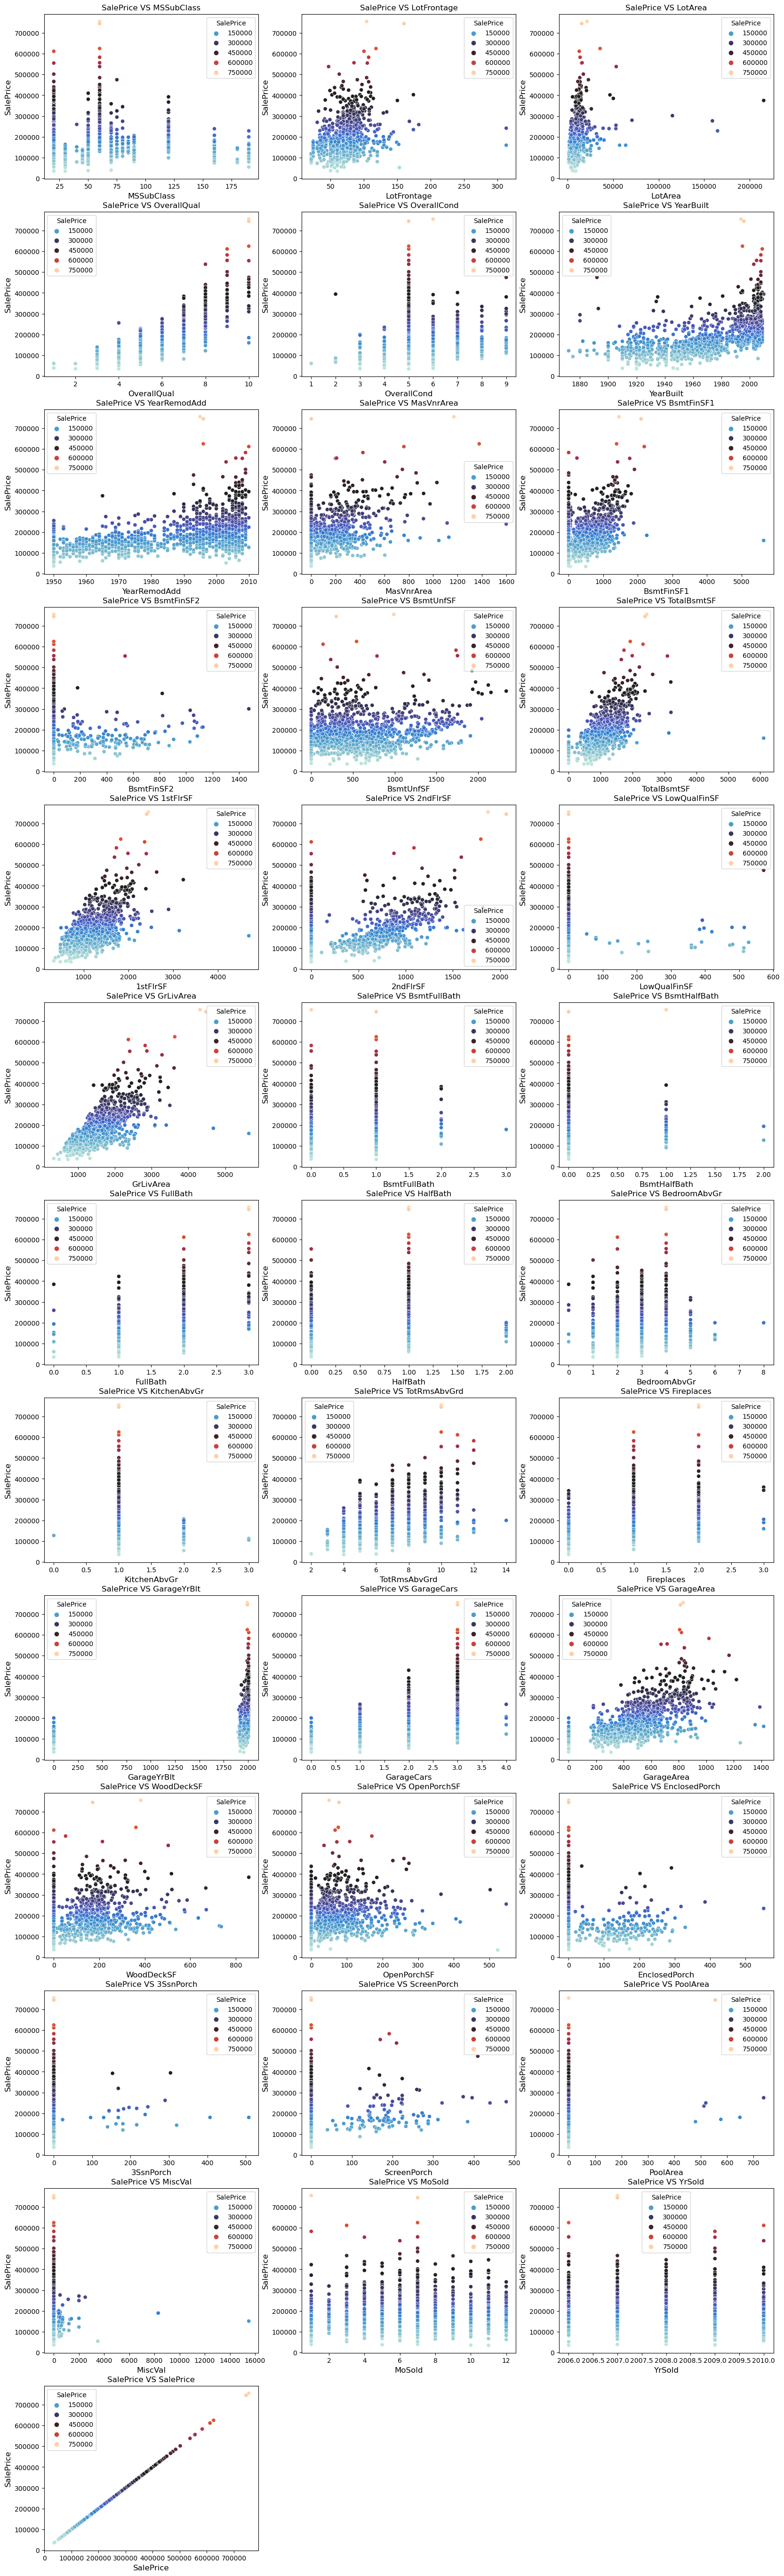

In [147]:
plt.figure(figsize=(20,70))
for n, column in enumerate(Numeric_vars):
    ax = plt.subplot(13, 3, n + 1)
    sns.scatterplot(x= column, y='SalePrice', hue='SalePrice',data=Numeric_df,ax=ax,palette='icefire')
    plt.xlabel(column,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(column))

### Insights from pair plot

- selling price of House is more for newly constructed and renowed buildings.
- selling price has linear relation ship with Lotfrontage, Garage area , ground live area , Firstfloor & second Floor square feet area, Ground live area and basement area.
- selling price of furnished and high porcharea houses price is more compared to unfurnished and low porch area houses.

In [148]:
# plot the heat map to know the co-relation between prdicted price variables.

<Figure size 640x480 with 0 Axes>

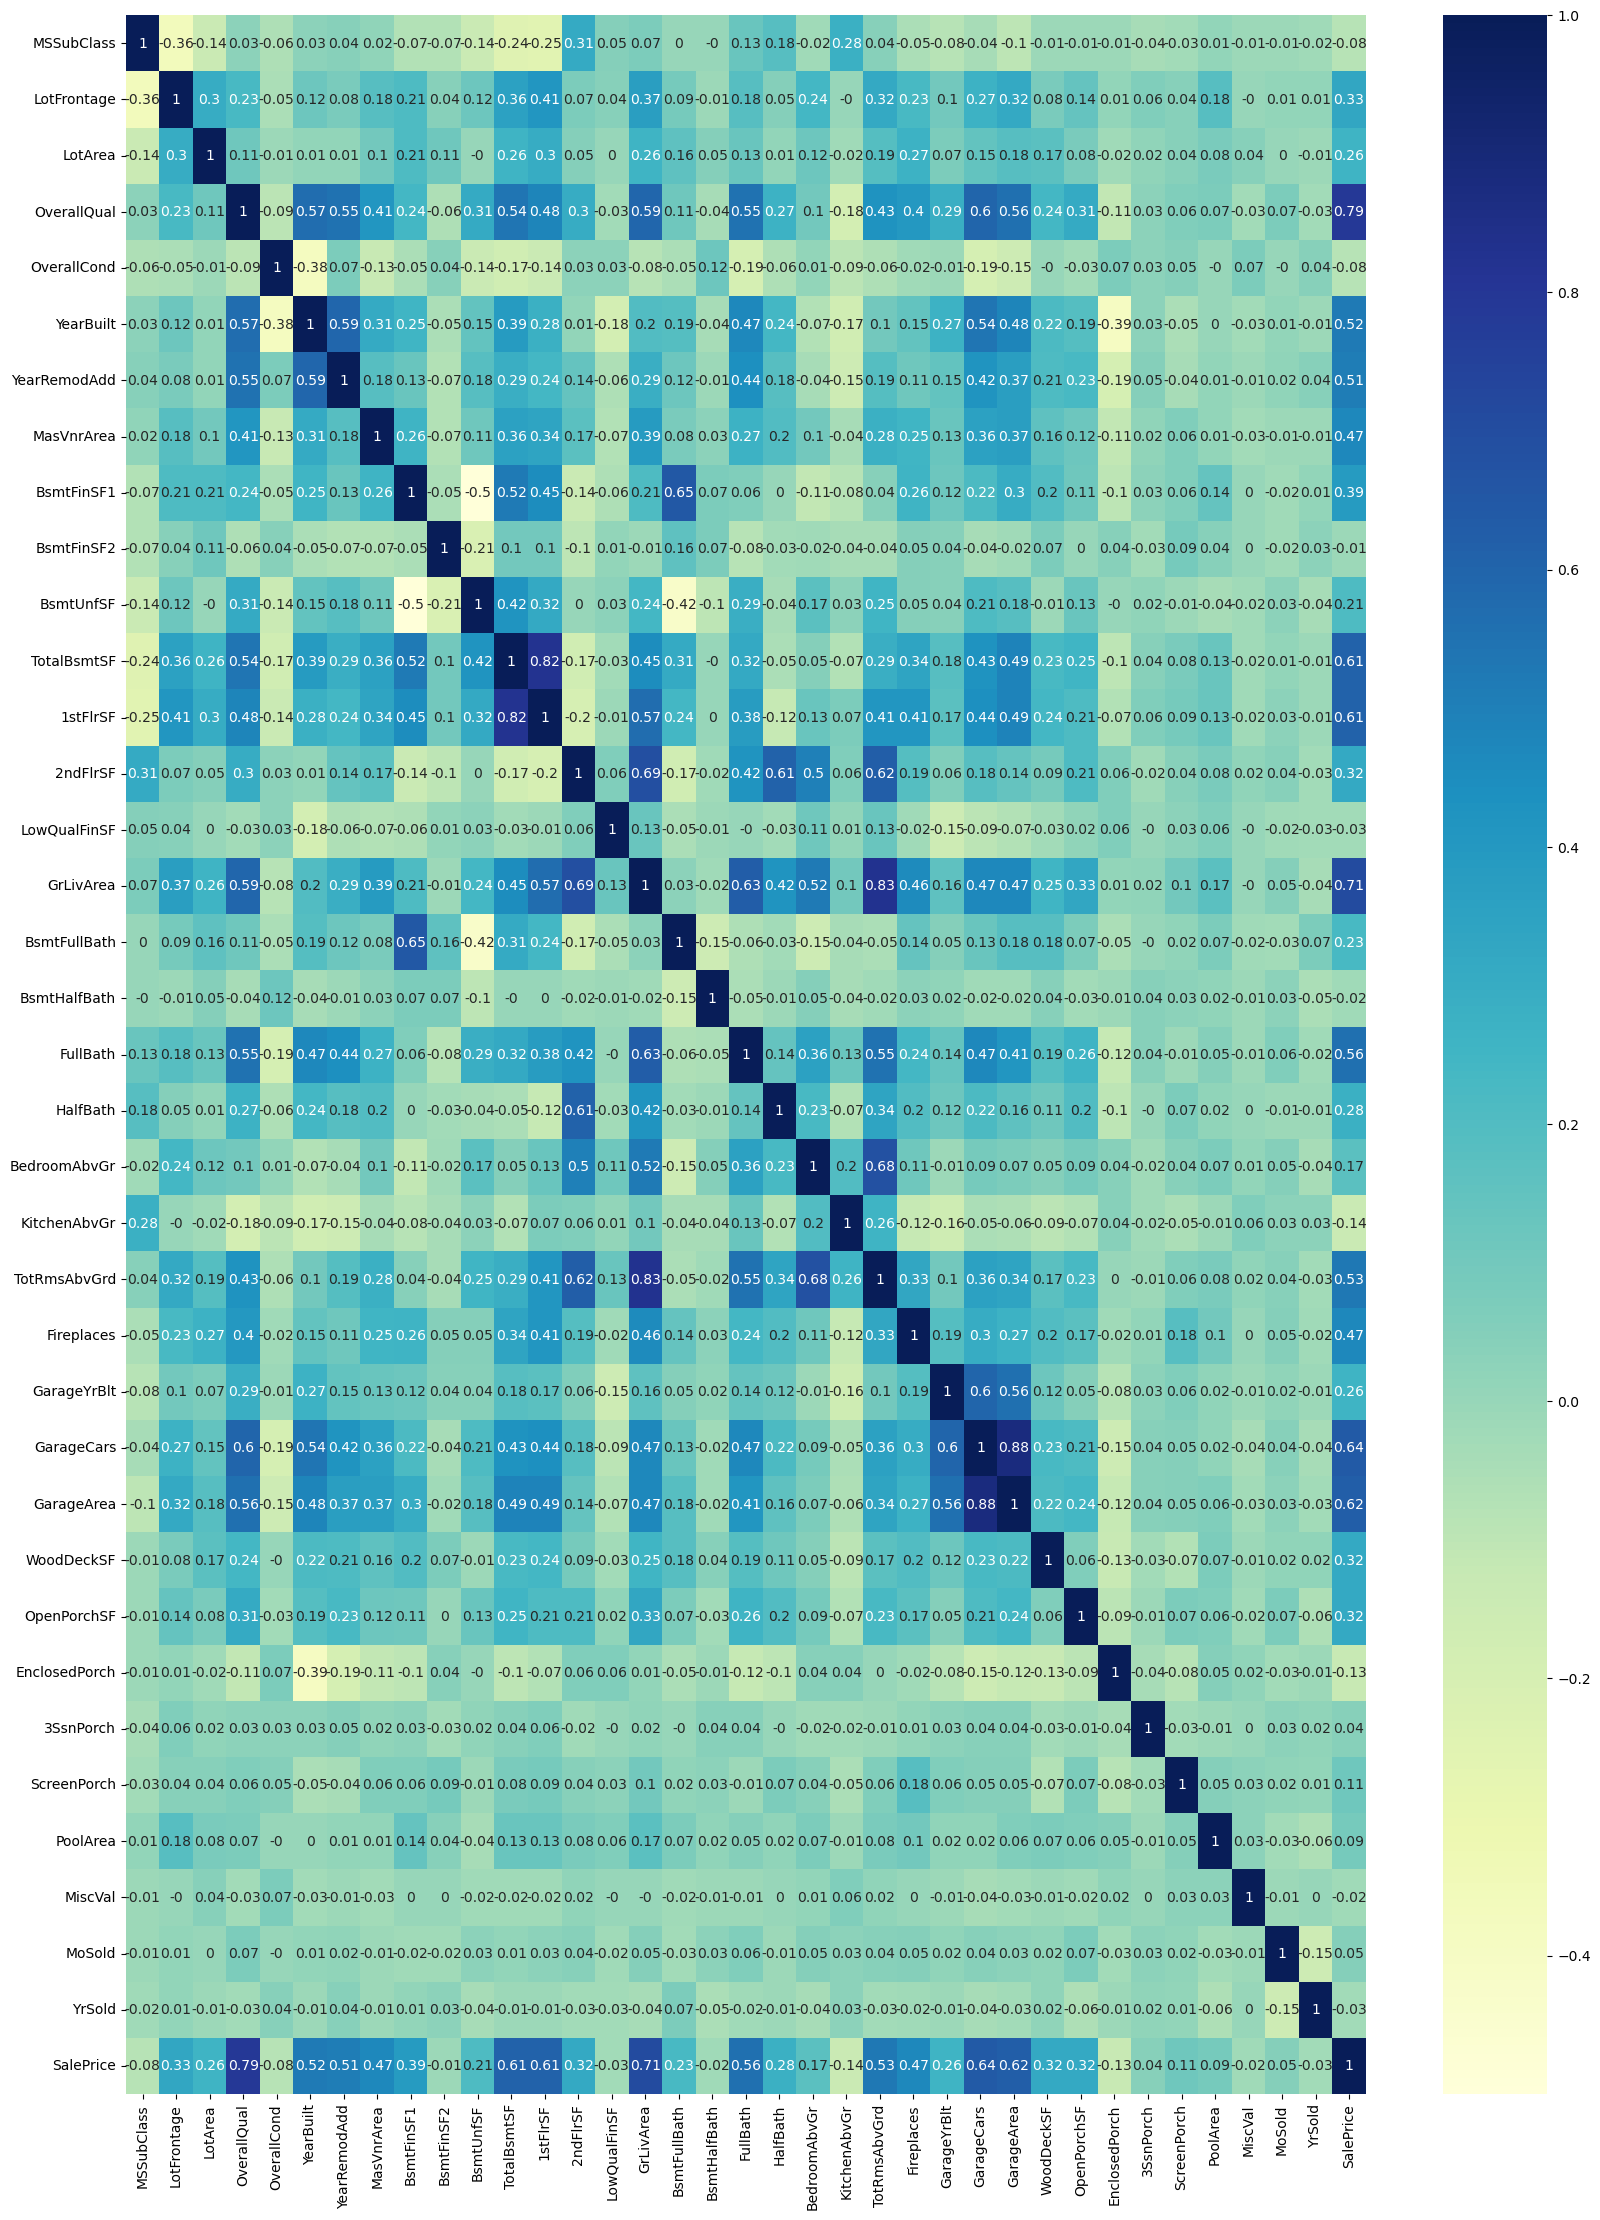

In [149]:
fig = plt.figure()
plt.figure(figsize = (20,27))
sns.heatmap(round(Numeric_df.corr(),2), cmap="YlGnBu", annot = True)
plt.show()

- OverallQual, YearBuilt,Yearremodadd,Masvnrarea,TotalBsmntSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,Fireplaces,Garage cars and Garage area variables are influincing the selling price of the houses.

In [150]:
# Visualising categorical predictor variables with Target Variables

In [151]:
Object_vars = Object_df.columns.to_list()

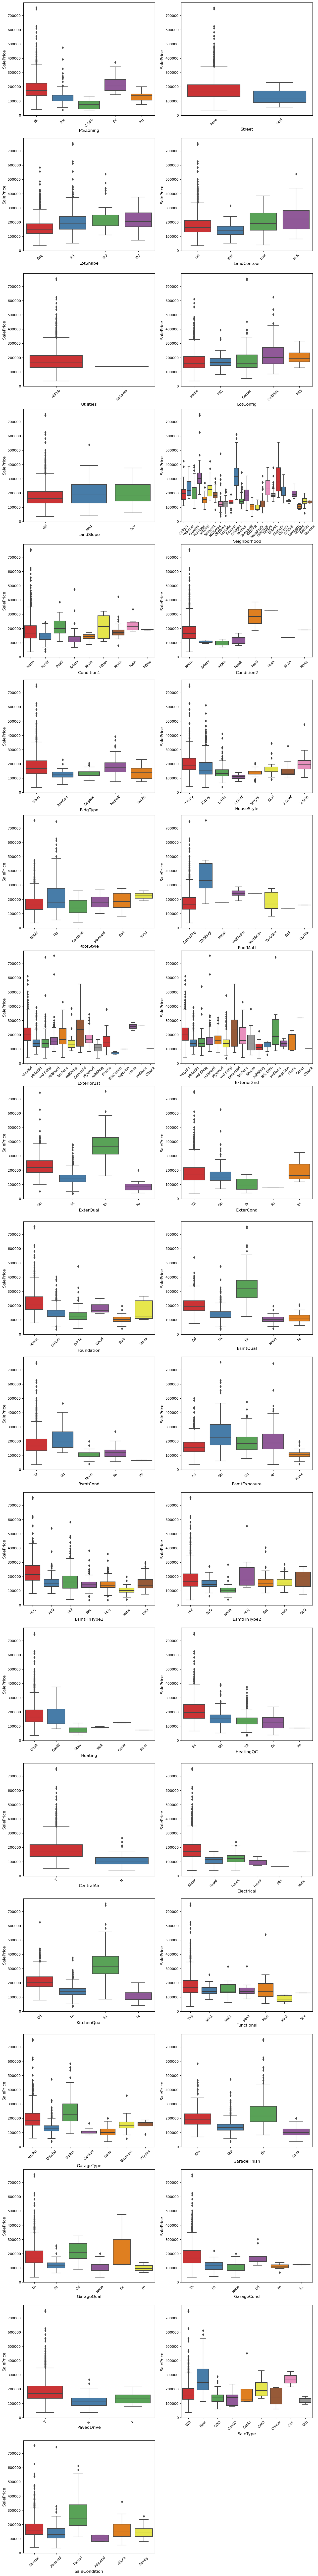

In [152]:
plt.figure(figsize=(15,140))
for n, column in enumerate(Object_vars):
    ax = plt.subplot(20,2, n + 1)
    sns.boxplot(x=column, y="SalePrice", data=House_df, palette="Set1")
    plt.xlabel(column,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    plt.xticks(rotation=45)
    #ax.set_title('SalePrice'+' VS '+str(column))

### Insights from categorical variables

- Residential Houses prices in low dencity and in Floating vilages are high  and in Commercial areas are low. 
- Paved road access to street has high sale price.
- Irregular shape houses prices are high compared to regular shapes and Moderately irregular shape houses preferred most.
- Hill side houses pricess are high.
- Houses located in North ridge sale prices are high.
- Houses located Within 200' of North-South Railroad and Near positive off-site feature--park, greenbelt, etc. prices are high.
- Single family independent houses and  town houses outer units has high prices.
- Two story and Two and Half story finished house prices are more.
- Wood roof house prices are high.
- Houses prices constructed with cement are high.
- Houses prices having Excellent Exterior material quality are high and low for fair quality houses.
- Concrete and Wood foundation houses prices are more and the foundation height more than 100 inches huose prices are high.
- Good Basement houses prices are high.
- Completely finished houses prices are high.
- House prices having Gas heating facility are high.
- Airconditioned houses with standard eletrical circuit breakers & Romex has high prices.
- House prices having Good quality kitchen are high.
- Houses having inside garage prices are high.
- Under construction houses and finished houses prices are high.

## Model building 


#### Data Preparation

- Covert the categorical data into numerical form.

In [153]:
# verify the Numeric , Object data frame with Main Dataframe

In [154]:
print('\n',House_df.shape,'\n',Numeric_df.shape,'\n',Object_df.shape)


 (1460, 74) 
 (1460, 37) 
 (1460, 37)


In [155]:
# create dummies for categorical variables

In [156]:
Object_dummy = pd.get_dummies(Object_df , drop_first=True).astype('int')

In [157]:
Object_dummy

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0               0            0            1            0            1   
1               0            0            1            0            1   
2               0            0            1            0            1   
3               0            0            1            0            1   
4               0            0            1            0            1   
...           ...          ...          ...          ...          ...   
1455            0            0            1            0            1   
1456            0            0            1            0            1   
1457            0            0            1            0            1   
1458            0            0            1            0            1   
1459            0            0            1            0            1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0                0             0             1                0   
1                0             0             1                0   
2                0             0             0                0   
3                0             0             0                0   
4                0             0             0                0   
...            ...           ...           ...              ...   
1455             0             0             1                0   
1456             0             0             1                0   
1457             0             0             1                0   
1458             0             0             1                0   
1459             0             0             1                0   

      LandContour_Low  ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0                   0  ...               0               0             0   
1                   0  ...               0               0             0   
2                   0  ...               0               0             0   
3                   0  ...               0               0             0   
4                   0  ...               0               0             0   
...               ...  ...             ...             ...           ...   
1455                0  ...               0               0             0   
1456                0  ...               0               0             0   
1457                0  ...               0               0             0   
1458                0  ...               0               0             0   
1459                0  ...               0               0             0   

      SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                0            1                      0                     0   
1                0            1                      0                     0   
2                0            1                      0                     0   
3                0            1                      0                     0   
4                0            1                      0                     0   
...            ...          ...                    ...                   ...   
1455             0            1                      0                     0   
1456             0            1                      0                     0   
1457             0            1                      0                     0   
1458             0            1                      0                     0   
1459             0            1                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                        0                     1                      0  
1                        0                     1                      0  
2                        0                     1                      0  
3                        0                     0                      0  
4                        0                     1                      0  
...   

In [158]:
House_new = pd.concat([Numeric_df,Object_dummy], axis=1)

#### Divide X , Ysets for model building

In [159]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = House_new.columns
House_new = pd.DataFrame(scale(House_new))
House_new.columns = cols
House_new.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=240)

In [160]:
y= House_new.pop('SalePrice')
X= House_new

In [161]:
# import libraries to build the model 

In [162]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import os
import statsmodels
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
# Splitting the Data into Training and Test sets

In [164]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,random_state=100)

In [165]:
# verify test and train dataframes

In [166]:
print('\n',X.shape,'\n',X_train.shape,'\n',X_test.shape)


 (1460, 239) 
 (1021, 239) 
 (439, 239)


In [167]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
318     0.073375     0.914450 -0.061820     0.651479    -0.517200   0.719786   
239    -0.163109    -0.811244 -0.177977    -0.071836    -1.416142  -0.870009   
986    -0.163109    -0.493353 -0.521839    -0.071836     2.179628  -2.029235   
1416    3.147673    -0.447940  0.082500    -1.518467     0.381743  -2.857254   
390    -0.163109    -0.902070 -0.211652    -0.795151     2.179628  -2.360443   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
318       0.394133    0.846202    1.191731   -0.288653  ...       -0.058621   
239      -1.689368   -0.570750   -0.766852   -0.288653  ...       -0.058621   
986       0.878668   -0.570750   -0.973018   -0.288653  ...       -0.058621   
1416     -1.689368   -0.570750   -0.973018   -0.288653  ...       -0.058621   
390      -1.689368   -0.570750   -0.444442    2.135943  ...       -0.058621   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
318        -0.058621     -0.301962     -0.045376     0.390293   
239        -0.058621     -0.301962     -0.045376     0.390293   
986        -0.058621     -0.301962     -0.045376     0.390293   
1416       -0.058621     -0.301962     -0.045376     0.390293   
390        -0.058621     -0.301962     -0.045376     0.390293   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
318               -0.052414             -0.091035             -0.117851   
239               -0.052414             -0.091035             -0.117851   
986               -0.052414             -0.091035             -0.117851   
1416              -0.052414             -0.091035             -0.117851   
390               -0.052414             -0.091035             -0.117851   

      SaleCondition_Normal  SaleCondition_Partial  
318               0.467651              -0.305995  
239               0.467651              -0.305995  
986               0.467651              -0.305995  
1416              0.467651              -0.305995  
390               0.467651              -0.305995  

[5 rows x 239 columns]

In [168]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
1436   -0.872563    -0.447940 -0.152020    -1.518467     0.381743  -0.008870   
57      0.073375     0.869037  0.113068     0.651479    -0.517200   1.084115   
780    -0.872563    -0.311701 -0.264769     0.651479    -0.517200   0.786028   
382     0.073375     0.414907 -0.127465     0.651479    -0.517200   1.150356   
1170    0.546344     0.278668 -0.063824    -0.071836     0.381743   0.189854   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
1436     -0.671845   -0.570750    0.378031   -0.288653  ...       -0.058621   
57        0.927122   -0.570750   -0.973018   -0.288653  ...       -0.058621   
780       0.539493   -0.360421   -0.973018   -0.288653  ...       -0.058621   
382       1.024029   -0.570750   -0.973018   -0.288653  ...       -0.058621   
1170     -0.381123   -0.570750    0.171865   -0.288653  ...       -0.058621   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1436       -0.058621     -0.301962     -0.045376     0.390293   
57         -0.058621     -0.301962     -0.045376     0.390293   
780        -0.058621     -0.301962     -0.045376     0.390293   
382        -0.058621     -0.301962     -0.045376     0.390293   
1170       -0.058621     -0.301962     -0.045376     0.390293   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1436              -0.052414             -0.091035             -0.117851   
57                -0.052414             -0.091035             -0.117851   
780               -0.052414             -0.091035             -0.117851   
382               -0.052414             -0.091035             -0.117851   
1170              -0.052414             -0.091035             -0.117851   

      SaleCondition_Normal  SaleCondition_Partial  
1436              0.467651              -0.305995  
57                0.467651              -0.305995  
780               0.467651              -0.305995  
382               0.467651              -0.305995  
1170              0.467651              -0.305995  

[5 rows x 239 columns]

## Linear Regression

 predicting House prices, a dataset using linear regression.

In [169]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [170]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-591008422.9442668
[-4.94037464e-03  2.36239947e-02  9.23256643e-02  1.12679411e-01
  8.17001505e-02  1.58234681e-01  3.02189358e-02  3.52555712e-02
  1.33897968e+10  4.73589416e+09  1.29720095e+10 -1.28791926e+10
  8.30193637e+09  9.37440829e+09  1.04417623e+09 -1.12846432e+10
  1.17418766e-02 -2.99799442e-03  2.34568119e-03 -2.28909552e-02
 -3.64794731e-02 -4.34004366e-02 -8.61692429e-03  7.60360062e-03
  2.87990570e-01  4.38625813e-02  2.00278759e-02  1.36541128e-02
  1.40340328e-02 -6.60929084e-03  7.54719228e-03  8.06474686e-03
  4.98673916e-02  5.03196567e-03 -4.49931622e-03 -7.94875622e-03
  6.63715899e-02  3.57125401e-02  1.40559435e-01  9.78991985e-02
  2.63899565e-02 -1.99636817e-03 -1.69396400e-04  7.80031085e-03
  5.40997088e-03 -1.79446936e-02  1.60311460e-02 -2.78711319e-04
  2.74058282e-02 -1.41645968e-02  3.09610367e-03  2.58088112e-04
  1.13371611e-02 -3.52017879e-02  9.48169827e-03  1.24056339e-02
  2.96686292e-02 -4.49824333e-03  1.56950951e-03  6.83295727e-02
 -9.76

In [171]:
from sklearn.metrics import r2_score, mean_squared_error

In [172]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9487963615071314
-7.39241434868302e+20
51.81310089631502
3.3121343436671874e+23
0.05074740538326643
7.544725156417283e+20


## Ridge and Lasso Regression

Let's now try predicting House prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [173]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [174]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [175]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.50724168e-02  7.55011869e-03  3.52578922e-02  1.10905180e-01
  3.40225293e-02  2.37719639e-02  3.94872483e-02  4.62663466e-02
  3.17397829e-02  9.40382214e-03  1.24265701e-02  4.89721953e-02
  6.95546760e-02  6.42217349e-02 -5.04018626e-03  1.04054368e-01
  3.14907854e-02  1.85191926e-03  4.94024335e-02  2.51974991e-02
  2.79715751e-03 -2.50293211e-02  5.48059654e-02  4.58530703e-02
 -8.67522442e-04  5.87022442e-02  4.30800879e-02  2.48100405e-02
  1.31569752e-02 -6.72009116e-04  1.17821466e-02  1.51444223e-02
  1.14757000e-03 -1.02548969e-05 -2.02831719e-03 -5.65449862e-03
  8.43844968e-03  2.01573687e-03  1.56575344e-02 -1.13886539e-02
  1.09669828e-02  5.02514525e-03 -2.80028851e-02 -5.17210199e-03
  1.84492856e-02  5.99784813e-03  1.83632242e-02 -1.01197659e-02
  2.69368893e-02 -1.45696705e-02 -6.33617481e-03 -4.02359979e-03
  9.31617412e-03  7.89313800e-04 -3.72690746e-04 -5.10409530e-03
  1.62570433e-03  2.73312414e-03 -1.53621483e-02  3.70864263e-02
 -3.73627437e-02 -1.74930

In [176]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8837069524207428
0.8564421517848757
117.67725077980975
64.32037720680296
0.11525685678727694
0.14651566561914114


## Lasso

In [177]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [178]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [179]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised

alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [180]:
lasso.coef_

array([-8.08573126e-02, -0.00000000e+00,  4.41812111e-02,  1.95083271e-01,
        4.46732128e-02,  6.65372409e-02,  4.48498078e-02,  2.40362047e-02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  2.76876863e-02,
        0.00000000e+00,  0.00000000e+00, -1.81677975e-02,  3.48759141e-01,
        4.93123502e-02,  0.00000000e+00,  2.62560745e-02,  0.00000000e+00,
       -4.30873358e-03, -2.80958368e-02,  0.00000000e+00,  2.17761466e-02,
       -0.00000000e+00,  8.86242264e-02,  0.00000000e+00,  1.21931294e-02,
        0.00000000e+00, -0.00000000e+00,  3.28853156e-03,  7.14786558e-03,
       -1.24042174e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.49739524e-02, -5.30431524e-03,
        9.94376829e-03,  0.00000000e+00, -3.03227951e-02, -0.00000000e+00,
        4.46261926e-05,  0.00000000e+00,  4.74448428e-03, -6.46078707e-03,
        3.02207391e-02, -5.28783344e-03, -3.10863661e-04,  0.00000000e+00,
        0.00000000e+00,  

In [181]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8989032123511655
0.8430301187244578
102.30011407240013
70.32957166243084
0.10019599811204714
0.16020403567751898


In [182]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.487964e-01          0.883707          0.898903
1   R2 Score (Test)      -7.392414e+20          0.856442          0.843030
2       RSS (Train)       5.181310e+01        117.677251        102.300114
3        RSS (Test)       3.312134e+23         64.320377         70.329572
4       MSE (Train)       2.252718e-01          0.339495          0.316538
5        MSE (Test)       2.746766e+10          0.382774          0.400255

### Inferences from METRICS

1. The Ridge model explains 86%  and Lasso model 84% on test data.
2. The RSS is optimized in ridge compared to Lasso model.
3. Mean squared error of test data in Ridge model is lesser than Lasso model. 

### Afetr analysing inferences we can conclude that Ridge Model should be used for prediction of target variable.

## Lets observe the changes in the coefficients after regularization

In [183]:
betas = pd.DataFrame(index=X.columns)

In [184]:
betas.rows = X.columns

In [185]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [186]:
print(round(betas['Ridge'].sort_values(ascending=False),2).head(5),'\n', round(betas['Ridge'].sort_values(),2).head(5))

OverallQual             0.11
GrLivArea               0.10
Neighborhood_NoRidge    0.08
Neighborhood_NridgHt    0.07
1stFlrSF                0.07
Name: Ridge, dtype: float64 
 Condition2_PosN   -0.07
BsmtQual_Gd       -0.06
KitchenQual_TA    -0.04
KitchenQual_Gd    -0.04
ExterQual_TA      -0.04
Name: Ridge, dtype: float64


In [187]:
print(round(betas['Lasso'].sort_values(ascending=False),2).head(5),'\n', round(betas['Lasso'].sort_values(),2).head(5))


GrLivArea               0.35
OverallQual             0.20
Neighborhood_NoRidge    0.09
Neighborhood_NridgHt    0.09
GarageCars              0.09
Name: Lasso, dtype: float64 
 Condition2_PosN   -0.14
BsmtQual_Gd       -0.10
KitchenQual_Gd    -0.10
KitchenQual_TA    -0.08
MSSubClass        -0.08
Name: Lasso, dtype: float64


### After analysing the both models the most significant variables are furnished below

1. The selling price of houses positively corelated with  Ground living Area , OverallQuality, and Location North Ridge , North Ridge _heights.
2. The selling price of houses Negatively corelated with Near positive off-site feature--park, greenbelt, etc.,basement height is between 90 - 99 inches,Houses having the kitchen quality good or average. 


## Validation of assumptions

In [188]:
y_pred_train_R = ridge.predict(X_train)
y_pred_train_L = lasso.predict(X_train)


#### Residual analysis Ridge model

<Figure size 640x480 with 0 Axes>

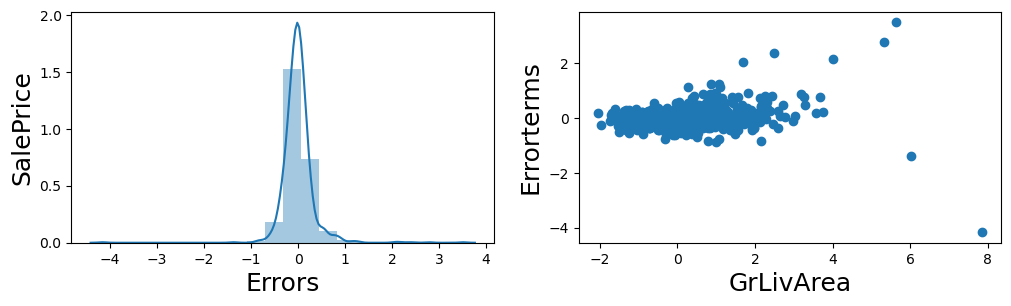

In [189]:
fig = plt.figure()
# plot histogram with probability density function to verify the distribution
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.distplot((y_train - y_pred_train_R), bins=20)
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.ylabel('SalePrice', fontsize=18)
# plot scattor plot of resdues of continuous variable OverallQual to verify the spread of error terms
plt.subplot(1,2,2)
plt.scatter(X_train.GrLivArea , y_train - y_pred_train_R )
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('GrLivArea', fontsize=18)
plt.ylabel('Errorterms', fontsize=18)
plt.show()


#### Residual analysis Lasso model

<Figure size 640x480 with 0 Axes>

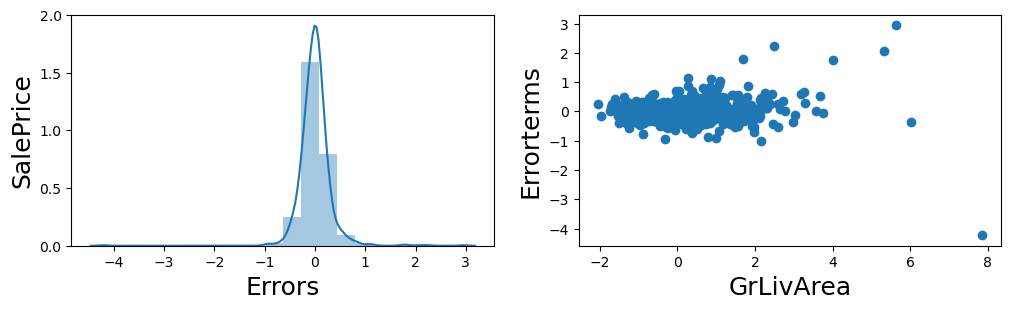

In [190]:
fig = plt.figure()
# plot histogram with probability density function to verify the distribution
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.distplot((y_train - y_pred_train_L), bins=20)
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.ylabel('SalePrice', fontsize=18)
# plot scattor plot of resdues of continuous variable OverallQual to verify the spread of error terms
plt.subplot(1,2,2)
plt.scatter(X_train.GrLivArea , y_train - y_pred_train_L )
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('GrLivArea', fontsize=18)
plt.ylabel('Errorterms', fontsize=18)
plt.show()


## Model Evaluation

In [191]:
y_pred_test_R = ridge.predict(X_test)
y_pred_test_L = lasso.predict(X_test)


###  Ridge model evaluation

Text(0, 0.5, 'Predicted')

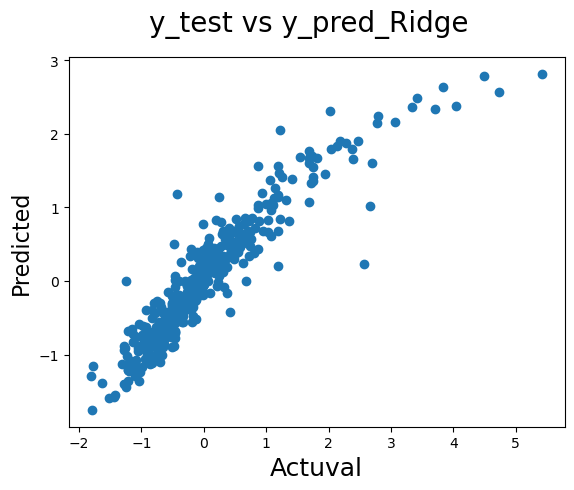

In [192]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test_R)
fig.suptitle('y_test vs y_pred_Ridge', fontsize=20)              # Plot heading 
plt.xlabel('Actuval', fontsize=18)                          # X-label
plt.ylabel('Predicted', fontsize=16)                          # Y-label

- predicted vs actual target variable shows the clear linear relation ship.

Text(0, 0.5, 'SalePrice')

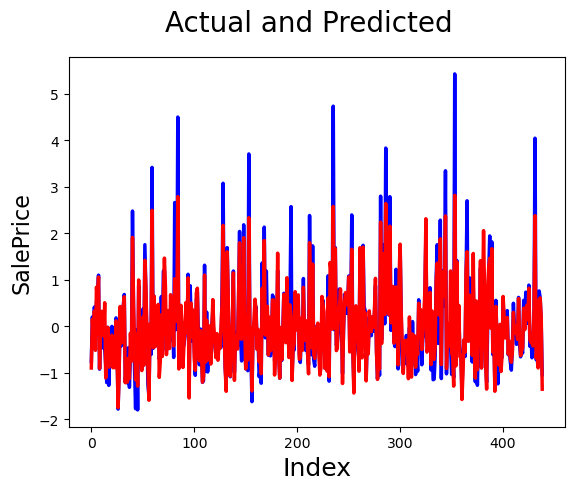

In [193]:
#Actual vs Predicted
c = [i for i in range(X_test.shape[0])]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_test_R, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('SalePrice', fontsize=16)                               # Y-label

- The line plot of actuval and predicted very closely imposed one on another shows model is significant.

### Lasso model evaiution

Text(0, 0.5, 'Predicted')

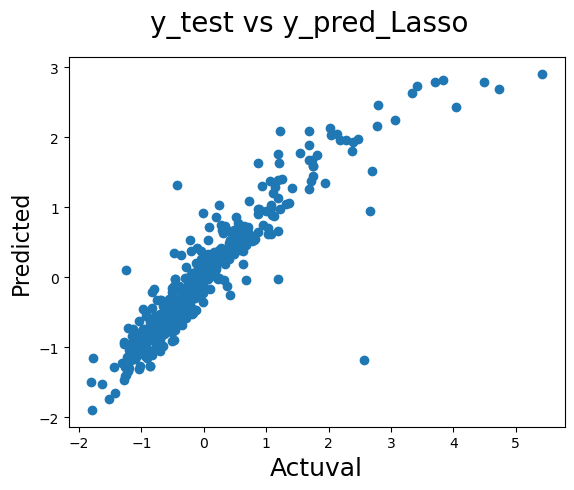

In [194]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test_L)
fig.suptitle('y_test vs y_pred_Lasso', fontsize=20)              # Plot heading 
plt.xlabel('Actuval', fontsize=18)                          # X-label
plt.ylabel('Predicted', fontsize=16)                          # Y-label

- predicted vs actual target variable shows the clear linear relation ship.

Text(0, 0.5, 'SalePrice')

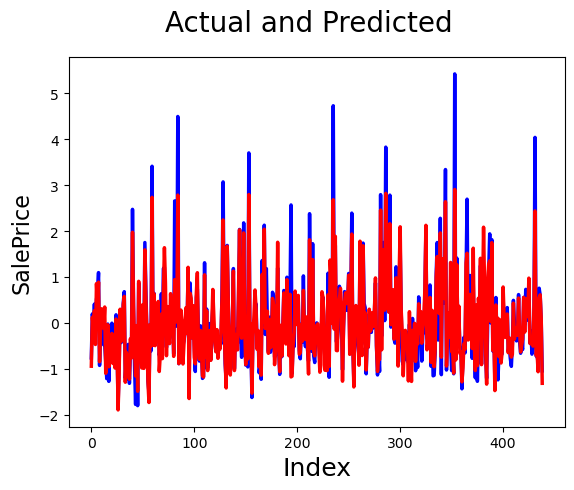

In [195]:
#Actual vs Predicted
c = [i for i in range(X_test.shape[0])]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_test_L, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('SalePrice', fontsize=16)                               # Y-label

- The line plot of actuval and predicted very closely imposed one on another shows model is significant.

</p><h1 align="center">Problem Statement - Part II</h1>. <br>

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### The optimum values of alpha for given Housing data set are
 - Ridge Regression model optimal alpha is 500
 - Lasso Regression model optimal alpha is 0.01

In [247]:
#Fitting Ridge model for alpha = 500x2 and printing coefficients which have been penalised
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=1000)

In [197]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8593439641310442
0.8416071345680903
142.33022481730328
70.96713260970627
0.13940276671626178
0.1616563385186931


## Lasso

In [198]:
#Fitting Ridge model for alpha = 0.01x2 and printing coefficients which have been penalised

alpha = 0.02

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.02)

In [200]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.8768865622727586
0.834303964767716
124.57882209956972
74.23928137904065
0.1220164761014395
0.16910998036227937


In [201]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric_alpha_double = pd.Series(metric4, name = 'Ridge Regression alpha doubled')
ls_metric_alpha_double = pd.Series(metric5, name = 'Lasso Regression alpha doubled')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg_metric_alpha_double, ls_metric_alpha_double], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)          0.883707          0.898903   
1   R2 Score (Test)          0.856442          0.843030   
2       RSS (Train)        117.677251        102.300114   
3        RSS (Test)         64.320377         70.329572   
4       MSE (Train)          0.339495          0.316538   
5        MSE (Test)          0.382774          0.400255   

   Ridge Regression alpha doubled  Lasso Regression alpha doubled  
0                        0.859344                        0.876887  
1                        0.841607                        0.834304  
2                      142.330225                      124.578822  
3                       70.967133                       74.239281  
4                        0.373367                        0.349309  
5                        0.402065                        0.411230

### Inferences from METRICS

1. alpha optimum : The Ridge model explains 86%  and Lasso model 84% on test data 
2. alpha doubled : The Ridge model explains 84%  and Lasso model 83% on test data
3. alpha optimum & alpha doubled : The RSS is optimized in ridge compared to Lasso model and increased with alpha.
4. alpha optimum & alpha doubled : Mean squared error of test data in Ridge model is lesser than Lasso model and increased with alpha.
  

### From inferences we can learn that for best value of Regularization factor or Penalty value Ridge and lasso Models will give best results and prediction accuracy will reduce with change of alpha.

## Lets observe the changes in the coefficients after regularization

In [202]:
betas = pd.DataFrame(index=X.columns)

In [203]:
betas.rows = X.columns

In [204]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [205]:
print(round(betas['Ridge'].sort_values(ascending=False),2).head(5),'\n', round(betas['Ridge'].sort_values(),2).head(5))

OverallQual             0.09
GrLivArea               0.09
Neighborhood_NoRidge    0.06
1stFlrSF                0.06
Neighborhood_NridgHt    0.06
Name: Ridge, dtype: float64 
 Condition2_PosN   -0.05
ExterQual_TA      -0.04
BsmtQual_Gd       -0.04
KitchenQual_TA    -0.04
BsmtExposure_No   -0.03
Name: Ridge, dtype: float64


In [206]:
print(round(betas['Lasso'].sort_values(ascending=False),2).head(5),'\n', round(betas['Lasso'].sort_values(),2).head(5))


GrLivArea               0.33
OverallQual             0.24
Neighborhood_NridgHt    0.10
GarageCars              0.09
Neighborhood_NoRidge    0.09
Name: Lasso, dtype: float64 
 Condition2_PosN   -0.12
MSSubClass        -0.07
BsmtQual_Gd       -0.05
BsmtExposure_No   -0.04
ExterQual_TA      -0.03
Name: Lasso, dtype: float64


### Analysing the both models with doubled alpha  the most significant variables are furnished below

1. The selling price of houses positively corelated with  Ground living Area , OverallQuality, and Location North Ridge , North Ridge _heights.
2. The selling price of houses Negatively corelated with Near positive off-site feature--park, greenbelt, etc.,basement height is between 90 - 99 inches,Houses having the kitchen quality good or average. 


### There is a no change in significant variables with change of alpha to double how ever it is clearly visible Reduction in coefficints magnitude implies that when alpha increases to inf coefficients tend to close zero in Ridge and becomes Zero in Lasso.

Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?



### Inferences from METRICS

1. The Ridge model explains 86%  and Lasso model 84% on test data.
2. The RSS is optimized in ridge compared to Lasso model.
3. Mean squared error of test data in Ridge model is lesser than Lasso model. 

### Afetr analysing inferences we can conclude that Ridge Model will perfrm better for prediction of target variable.

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

- The five most important predictor variables in Lasso are GrLivArea,OverallQual,Condition2_PosN,Neighborhood_NoRidge,GarageCars

In [216]:
Top_5 = ['GrLivArea','OverallQual','Condition2_PosN','Neighborhood_NoRidge','GarageCars']

In [ ]:
# remove the variables from predictor variables columns X

In [236]:
X_new = X.drop(X[Top_5] , axis=1)
X_train_new = X_train.drop(X_train[Top_5], axis =1)
X_test_new = X_test.drop(X_test[Top_5], axis =1)

## Lasso

In [220]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [221]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [242]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised

alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.01)

In [243]:
betas = pd.DataFrame(index=X_new.columns)

In [244]:
betas.rows = X_new.columns

In [245]:
betas['Lasso'] = lasso.coef_

In [246]:
print(round(betas['Lasso'].sort_values(ascending=False),2).head(5),'\n', round(betas['Lasso'].sort_values(),2).head(5))


2ndFlrSF            0.32
1stFlrSF            0.26
RoofMatl_WdShngl    0.12
RoofMatl_CompShg    0.09
YearBuilt           0.09
Name: Lasso, dtype: float64 
 BsmtQual_Gd      -0.11
KitchenQual_TA   -0.11
KitchenQual_Gd   -0.11
BsmtQual_TA      -0.10
MSSubClass       -0.09
Name: Lasso, dtype: float64


- The five most important predictor variables after excluding the five most important predictor variables in previous Lasso are 2ndFlrSF,1stFlrSF,RoofMatl_WdShngl,BsmtQual_Gd,KitchenQual_TA, KitchenQual_Gd